In [1]:
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%cd "D:\Imarticus\stat\flu from data driven"

D:\Imarticus\stat\flu from data driven


In [3]:
vaccinetrain=pd.read_csv('training_set_features.csv')

In [4]:
vaccinetest=pd.read_csv('test_set_features.csv')
vaccinetest.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [5]:
vaccinelabels=pd.read_csv('training_set_labels.csv')
# 2 dependent variables seasonal_vaccine and h1n1_vaccine
# seasonal_vaccine Balanced data
# h1n1_vaccine Imbalanced data

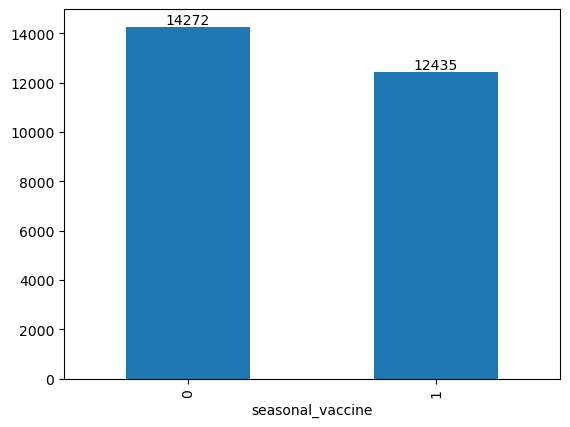

In [6]:
#seasonal vaccine -Balanced Data
ax= vaccinelabels.seasonal_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

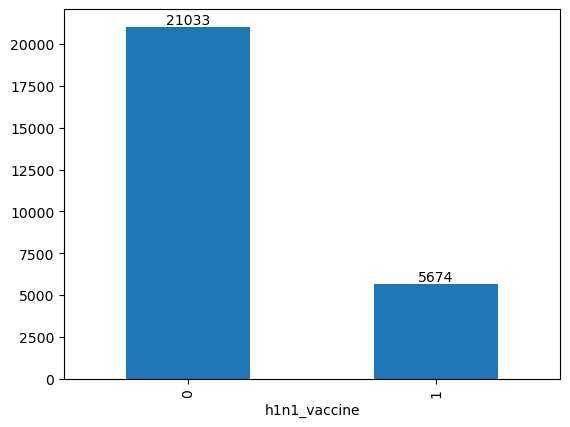

In [7]:
#h1n1 vaccine -ImBalanced Data
ax= vaccinelabels.h1n1_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [8]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [10]:
vaccinetrain.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [11]:
vaccinetest.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [12]:
#concatinate both the dataframes for preprocessing
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_months 

In [14]:
combinedf.isnull().sum()

respondent_id                      0
h1n1_concern                     177
h1n1_knowledge                   238
behavioral_antiviral_meds        150
behavioral_avoidance             421
behavioral_face_mask              38
behavioral_wash_hands             82
behavioral_large_gatherings      159
behavioral_outside_home          164
behavioral_touch_face            256
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
health_insurance               24502
opinion_h1n1_vacc_effective      789
opinion_h1n1_risk                768
opinion_h1n1_sick_from_vacc      770
opinion_seas_vacc_effective      914
opinion_seas_risk               1013
opinion_seas_sick_from_vacc     1058
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

In [15]:
#algorithm based missing valuse imputation (algorithm based)- considers impact of other variables on the missing value and
# imputes accordingly. 
# MICE- Multivariate Imputation using chained equations
# imputes both numeric and non numeric categorical variables

# step-1 Impute missing values woth mean (numeric) and mode (categorical)
# step-2 makes the missing values variables as dependent variable and if missing value variable is 
# numeric - Regression Algorithm
# non numeric- Classification Algorithm
# chained equations is where missing value variable or column is treated as dependent variable and all other variables as 
# independent variables and relevant regression/classification model is built.
# step-3 Missing values will be replace by predicted value/classes

In [16]:
# in python IterativeImputer in sklearn is experimental as of now IterativeImputer is similar to MICE algorithm
# before implementing IterativeImputer
# 1) Drop irrelevant variables or column
# 2) LabelEncode all object and categorical data, but retain missing as missing

In [17]:
combinedf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [18]:
combinedf=combinedf.drop('respondent_id',axis=1)

In [19]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
original=combinedf

In [22]:
mask=combinedf.isnull()

In [23]:
mask.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [25]:
combinedf=combinedf.where(~mask,original)

In [26]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [27]:
vaccinetrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [29]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy='most_frequent',max_iter=50)

combinedf_impute=imputer.fit_transform(combinedf)

combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

combinedf_impute.info()

combinedf_impute.to_csv('vaccineimp.csv')

In [30]:
combinedf_impute=pd.read_csv('vaccineimpute.csv')

In [31]:
#split data back to train and test
vaccinetrain_df=combinedf_impute.loc[0:26706]
vaccinetest_df=combinedf_impute.loc[26707:53414]

In [32]:
print(vaccinetrain_df.shape)
print(vaccinetest_df.shape)

(26707, 36)
(26708, 36)


In [33]:
y=vaccinelabels.h1n1_vaccine
X=vaccinetrain_df

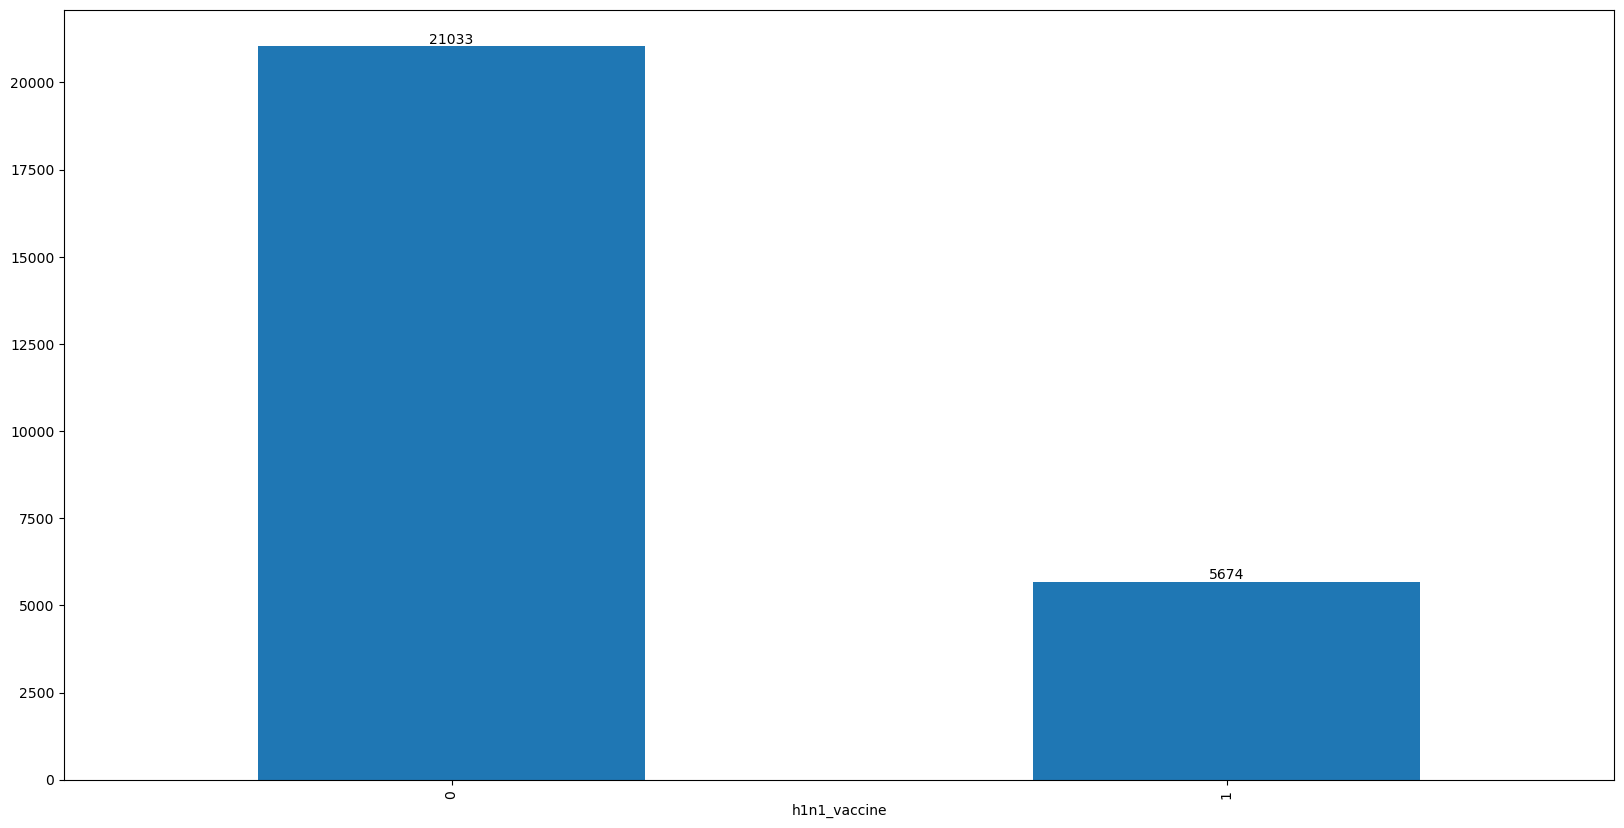

In [34]:
plt.figure(figsize=(20,10))
ax=y.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='h1n1_vaccine'>

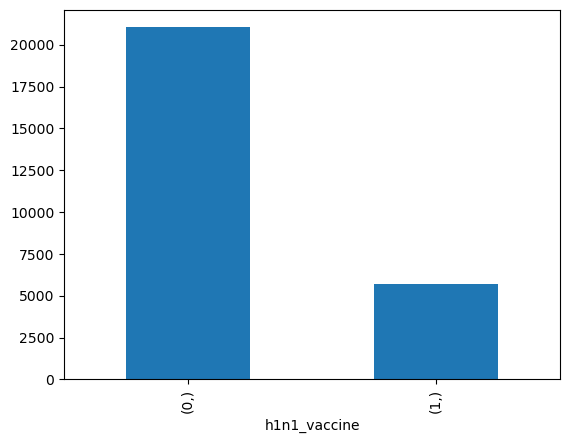

In [35]:
pd.DataFrame(y).value_counts().plot(kind='bar')# imbalance in classes or 
# levels-0- majority class(21033) & 1-minority classes(5674)

In [36]:
y=LabelEncoder().fit_transform(y)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
logit=LogisticRegression(max_iter=1000)

In [39]:
logitmodel=logit.fit(X,y)

In [40]:
logitmodel.score(X,y) # Accuracy

0.8215823566855132

In [41]:
logitpredict=logitmodel.predict(X)

In [42]:
print(classification_report(y,logitpredict))
# Minority class(1) predictions scores are worst.

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     21033
           1       0.64      0.37      0.47      5674

    accuracy                           0.82     26707
   macro avg       0.74      0.66      0.68     26707
weighted avg       0.80      0.82      0.80     26707



In [43]:
# imbalance data is a problem in classification both in binary and multinomial classification

# In imbalance Data within dependent variable, majority class will be more than 70% and minority class will be less than 30%.

#Model performance is several effected particularly in case of minority class

# overall accuracy of the model and majority class prediction, recall and F1 score will good but minority class, 
#precision,recall and F1-score will be worst

# Even AUC will be bad for Imbalanced Data.

# classification report must be checked in case of Imbalance Data

In [44]:
# dealing with imbalanced data sampling must be used . 2types of sampling
# 1) Random oversampling- in this method observations from minority class are duplicated till it equals the majority class
# 2) Random undersampling- I this method observations from majority class are deleted till it equals minority class

# Oversampling technniques are used when data is smaller in size
# undersampling technniques are used when data is larger in size

# Popular over sampling technniques is SMOTE.(it is widely used in industry(synthatic,minority))
# Popular under sampling technniques is Tomek Links.

In [45]:
!pip install imblearn

In [46]:
from imblearn.under_sampling import RandomUnderSampler

In [47]:
rus=RandomUnderSampler(random_state=42)

In [48]:
X_rus,y_rus=rus.fit_resample(X,y)

In [49]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_rus).value_counts())

0    21033
1     5674
Name: count, dtype: int64
0    5674
1    5674
Name: count, dtype: int64


In [50]:
logit_rus_model=logit.fit(X_rus,y_rus)

In [51]:
logit_rus_model.score(X_rus,y_rus)

0.7305252026788861

In [52]:
logit_rus_predict=logit_rus_model.predict(X_rus)

In [53]:
print(classification_report(y_rus,logit_rus_predict))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5674
           1       0.73      0.73      0.73      5674

    accuracy                           0.73     11348
   macro avg       0.73      0.73      0.73     11348
weighted avg       0.73      0.73      0.73     11348



In [54]:
from sklearn.metrics import RocCurveDisplay

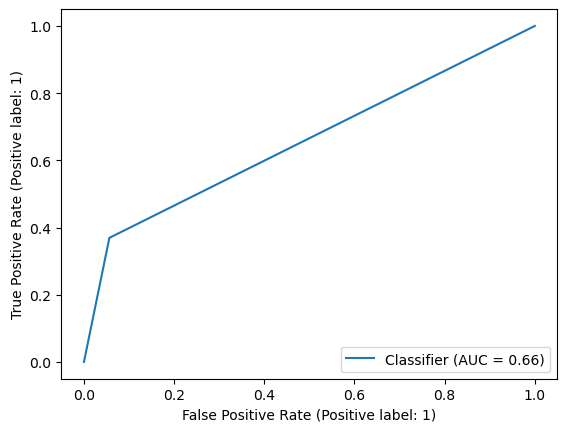

In [60]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
ros=RandomOverSampler(random_state=42)

In [63]:
X_ros,y_ros=ros.fit_resample(X,y)

In [64]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_ros).value_counts())

0    21033
1     5674
Name: count, dtype: int64
0    21033
1    21033
Name: count, dtype: int64


In [65]:
logit_ros_model=logit.fit(X_ros,y_ros)

In [66]:
logit_ros_model.score(X_ros,y_ros)

0.7210336138449104

In [67]:
logit_ros_predict=logit_ros_model.predict(X_ros)

In [68]:
print(classification_report(y_ros,logit_ros_predict))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     21033
           1       0.73      0.71      0.72     21033

    accuracy                           0.72     42066
   macro avg       0.72      0.72      0.72     42066
weighted avg       0.72      0.72      0.72     42066



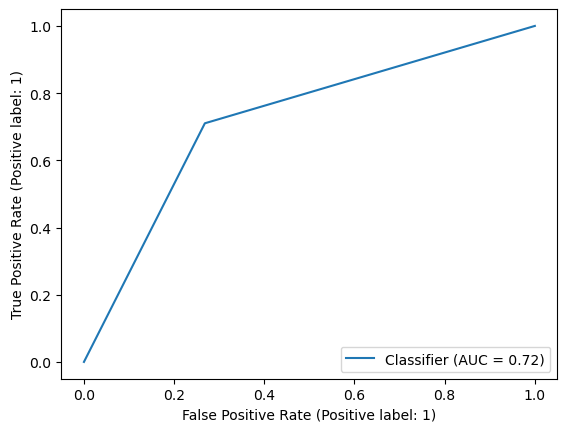

In [71]:
RocCurveDisplay.from_predictions(y_ros,logit_ros_predict)

In [ ]:
# oversampling Techniques-SMOTE-synthetic minority oversampling technique
# SMOTE uses KNN algorithm(Euclidean Distance) and creates artificial or synthetic data that lies within data range
# No outliers created
# SMOTE also uses Random number generator for generating random weights between 0 & 1

# Two independent variables -x1- income and x2- age\
# x1-2400,2500,2700,2300,2100,2440
# x2-46,34,45,28,25,41

# choose a random weight between 0 & 1. Randomly selected 0.60
# 2500+0.60*(2400-2500)=2440(synthetic data point)
# 34+0.60*(46-34)=41 (synthetic data point)

# different Types of SMOTE
# SMOTE will only with Numeric data
# SMOTENC will work for both numeric and nonnumeric categorical data
# SMOTEN will work for only Nonnumeric Categrical Data

In [72]:
from imblearn.over_sampling import SMOTEN

In [73]:
smote=SMOTEN(random_state=42)

In [74]:
X_smote,y_smote=smote.fit_resample(X,y)

In [143]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())


0    21033
1     5674
Name: count, dtype: int64
0    21033
1    21033
Name: count, dtype: int64


In [144]:

logit_smote_model=logit.fit(x_smote,y_smote)


In [145]:

logit_smote_model.score(x_smote,y_smote)


0.8273427471116817

In [146]:

logit_smote_predict=logit_smote_model.predict(x_smote)


In [147]:

print(classification_report(y_smote,logit_smote_predict))


              precision    recall  f1-score   support

           0       0.82      0.83      0.83     21033
           1       0.83      0.82      0.83     21033

    accuracy                           0.83     42066
   macro avg       0.83      0.83      0.83     42066
weighted avg       0.83      0.83      0.83     42066



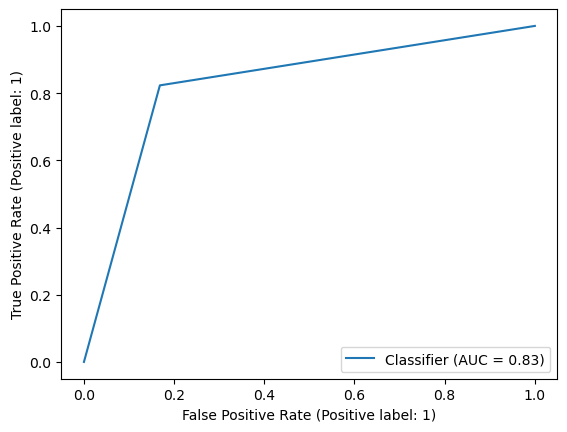

In [148]:

RocCurveDisplay.from_predictions(y_smote,logit_smote_predict)

# Decission Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
tree=DecisionTreeClassifier(max_depth=12)

In [88]:
treemodel=tree.fit(X,y)

In [89]:
treemodel.score(X,y)

0.8996143333208522

In [90]:
treepredict=treemodel.predict(X)

In [91]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     21033
           1       0.85      0.64      0.73      5674

    accuracy                           0.90     26707
   macro avg       0.88      0.80      0.83     26707
weighted avg       0.90      0.90      0.89     26707



In [92]:
tree_smote_model=tree.fit(X_smote,y_smote)

In [93]:
tree_smote_model.score(X_smote,y_smote)

0.9041030761184805

In [94]:
tree_smote_predict=tree_smote_model.predict(X_smote)

In [95]:
print(classification_report(y_smote,tree_smote_predict))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     21033
           1       0.90      0.90      0.90     21033

    accuracy                           0.90     42066
   macro avg       0.90      0.90      0.90     42066
weighted avg       0.90      0.90      0.90     42066



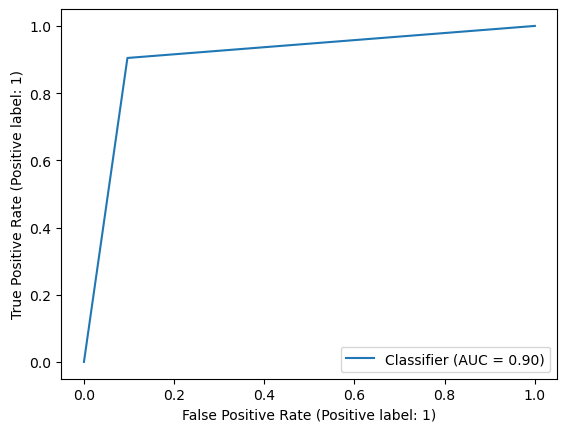

In [96]:
RocCurveDisplay.from_predictions(y_smote,tree_smote_predict)

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
RF=RandomForestClassifier(n_estimators=3000,max_depth=12)

In [113]:
RFmodel=RF.fit(X,y)

In [114]:
RFmodel.score(X,y)

0.9057550454936908

In [115]:
RFpredict=RFmodel.predict(X)

In [116]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     21033
           1       0.92      0.61      0.73      5674

    accuracy                           0.91     26707
   macro avg       0.91      0.80      0.84     26707
weighted avg       0.91      0.91      0.90     26707



In [117]:
RF_smote_model=RF.fit(X_smote,y_smote)

In [118]:
RF_smote_model.score(X_smote,y_smote)

0.9230019493177388

In [119]:
RF_smote_predict=RF_smote_model.predict(X_smote)

In [120]:
print(classification_report(y_smote,RF_smote_predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     21033
           1       0.93      0.91      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [124]:
gbmmodel=gbm.fit(X,y)

In [125]:
gbmmodel.score(X,y)

0.8681619051185082

In [126]:
gbmpredict=gbmmodel.predict(X)

In [127]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21033
           1       0.77      0.54      0.63      5674

    accuracy                           0.87     26707
   macro avg       0.83      0.75      0.78     26707
weighted avg       0.86      0.87      0.86     26707



In [128]:
gbm_smote_model=gbm.fit(X_smote,y_smote)

In [129]:
gbm_smote_model.score(X_smote,y_smote)

0.8893643322398136

In [130]:
gbm_smote_predict=gbm_smote_model.predict(X_smote)

In [131]:
print(classification_report(y_smote,gbm_smote_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     21033
           1       0.90      0.87      0.89     21033

    accuracy                           0.89     42066
   macro avg       0.89      0.89      0.89     42066
weighted avg       0.89      0.89      0.89     42066



In [133]:
test_gbm=gbm_smote_model.predict_proba(vaccinetest_df)

In [134]:
pd.DataFrame(test_gbm).to_csv('gbm_h1n1.csv')

In [138]:
test_RF=RF_smote_model.predict_proba(vaccinetest_df)

In [136]:
pd.DataFrame(test_RF).to_csv('RF_h1n1.csv')

In [149]:
test_logit=logit_smote_model.predict_proba(vaccinetest_df)

In [150]:
pd.DataFrame(test_logit).to_csv('log_h1n1.csv')

# Bias , variance and Tradeoff
prediction error has 3 components- bias, variance, & Irreducible error.

Irreducible error cannot be reduced by any algorithm. This error originates from wrong framing of business problem, faulty objective and unknown variables that may not exist at that point of time

Bias are simplyfying assumptions made by an algorithm to predict and also make it eassier for the cost or loss function to learn effectively. <br>
Parametric Algorithms like multiple linear regression, binary logistic regression have assumptions that must be checked before implementing algorithm. <br>
Low predictive accuracy or high predictive error if assumptions are not met <br>
Low Bias means few or no assumptions about variables <br>
High bias means many assumptions about variables <br>

High bias ML algorithms- Multiple Linear regression, Binary Logistic Regression
Low bias  ML algorithms- Tree based algorithms like decision tree,Random Forest, Gradient Boosting,KNN.

Variance is amount of deviance caused in dependent variable when there are minor to major changes in the input  variables or independent variables.

Low variance- Small or marginal or large changes in input data lead to small or marginal changes in dependent variable
HIgh variance- Small or marginal or large changes in input data lead to large or major changes in dependent variable

Non linear and non parametric algoritms are highly senstive to variance in input data. Decision Tree and other Tree based models highly sensitive to medium or large changes in input variables

Linear and parametric algoritms are deal with variance better and have good performance when there are medium to major changes in input variables

machine learning algorithms try to achieve low bias and low variance.

underfitting(high bias and low variance)
overfittinng(low bias and high variance)

# 28/08/2023

under fitting is where ML algorithm fails to capture underlying trend or pattern in data.
ML algorith doesnot fot on data and generally happens when there is not enough data.
Underfitting can be corrected by increasing both observations and decreasing variables.
Underfitting cam also be corrected by removing noise in data like skewness,kurtosis, and outliers
Underfitting can also be corrected by using variable selectoin methods like feature selection methods or reducing dimensionality using algorithm like principal component Analysis(PCA).

Overfitting is where there is drastic difference between train model and tested or validated model performance.
Large scale data has overfitting problem.
Non parametric algorithms like decision tree has overfitting problem.
Overfitting can be corrected by reducing data size using sampling methods.
REgulRIZtion techniques like lasso, Rodge, ElasticNEt can be used.
Reduce the model complexity by doing parameter or hyperparameter tuning

#Regularization techniques or penalized regression techniques are used to tackle overfitting problem.
#Regularization techniques prevent overfitting by adding a penalty term (lambda or alpha) of the regression coefficients or the regression object.
#Regularization using lambda or alpha tries to either shrink the number of variables (by making some coefficients zero) or by redeucing size of coefficients(making coefficient closer to zero)

#1) LASSO- least absolute shrinkage and selection operator also called as L1 norm or L1 penalty.
LASSO adds a penealty or lambda to absolute weights or coefficients of regressoin model.
LASSO will definitely make some of the coefficients zero there by reducing number of variables and also works as a feature or variable selection method.
LASSo doesnot work well with multicollinear data

Obj- Regression sum square model + lambda*(Absolute value of coefficients)

lambda or alpha value must be greater than 0 till infinity lambda or alpha value to zero- Multiple linear regression model will be built with no change in coefficients.
lambda or alpha value equals to infinity- all coefficients will be equal to zero.

Ridge regression or L2 norm or l2 penalty add a penalty lambda or alpha to sum square weights or coefficients.
Ridge regression shrinks the coefficiinets or weights closer to zero but not zero.
It is not a feature or variable selection technique.
Ridge regression is used when data is multicollinear

Elastic net -l1+l2 norm or penalty / lasso+ ridge
first lasso will be run and on lasso output ridge regression will be run.
elastic net is a feature or variable selection technique.